In [2]:
import pandas as pd
import kaggle
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:


kaggle.api.authenticate()

kaggle.api.dataset_download_files('ealaxi/paysim1', path='../../datasets', unzip=True)


In [5]:
data = pd.read_csv("..\..\datasets\PS_20174392719_1491204439457_log.csv")

This is a sample of 1 row with headers explanation:

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount -
amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction.

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Missing value and outliers

In [6]:
missing_values = data.isnull().sum()
print("Eksik Değerler:\n", missing_values)

# Yanlış veri veya aykırı değer kontrolü
outliers = data.describe(percentiles=[.25, .5, .75, .90, .95, .99]).transpose()
print("Aykırı Değerler:\n", outliers)

Eksik Değerler:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
Aykırı Değerler:
                     count          mean           std  min       25%  \
step            6362620.0  2.433972e+02  1.423320e+02  1.0    156.00   
amount          6362620.0  1.798619e+05  6.038582e+05  0.0  13389.57   
oldbalanceOrg   6362620.0  8.338831e+05  2.888243e+06  0.0      0.00   
newbalanceOrig  6362620.0  8.551137e+05  2.924049e+06  0.0      0.00   
oldbalanceDest  6362620.0  1.100702e+06  3.399180e+06  0.0      0.00   
newbalanceDest  6362620.0  1.224996e+06  3.674129e+06  0.0      0.00   
isFraud         6362620.0  1.290820e-03  3.590480e-02  0.0      0.00   
isFlaggedFraud  6362620.0  2.514687e-06  1.585775e-03  0.0      0.00   

                       50%           75%          90%           95%  \
step        

In [7]:
z_scores = (data['amount'] - data['amount'].mean()) / data['amount'].std()

# Eşik değerini belirleme (örneğin, 3 standart sapma)
threshold = 3

# Eşik değeri üzerindeki aykırı değerleri filtreleme
outliers = data[abs(z_scores) > threshold]

# Aykırı değerleri çıkarılmış veri seti
cleaned_data = data[abs(z_scores) <= threshold]

# Aykırı değerleri ve temizlenmiş veri setini görüntüleme
print("Aykırı Değerler:\n", outliers)
print("Temizlenmiş Veri Seti:\n", cleaned_data)


Aykırı Değerler:
          step      type      amount     nameOrig  oldbalanceOrg  \
359         1  TRANSFER  2421578.09   C106297322           0.00   
375         1  TRANSFER  2545478.01  C1057507014           0.00   
376         1  TRANSFER  2061082.82  C2007599722           0.00   
1153        1  TRANSFER  3776389.09   C197491520           0.00   
1202        1  TRANSFER  2258388.15    C12139181           0.00   
...       ...       ...         ...          ...            ...   
6362584   741  TRANSFER  5674547.89   C992223106     5674547.89   
6362598   742  TRANSFER  4009058.39  C1044665079     4009058.39   
6362599   742  CASH_OUT  4009058.39  C1970706589     4009058.39   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
359                0.00  C1590550415      8515645.77     19169204.93        0   
375            

# Feature Engineering with outliers

In [ ]:

data['inactive_duration'] = data['step'].diff()  # Örneğin, hareketsiz süreyi hesaplayalım

# İhtiyaca göre daha fazla özellik mühendisliği yapabilirsiniz
data['transaction_ratio'] = data['amount'] / data['oldbalanceOrg']
data['balance_change'] = data['newbalanceOrig'] - data['oldbalanceOrg']
# ... diğer özellikler .

# Feature Engineering without outliers

In [15]:
cleaned_data['inactive_duration'] = cleaned_data['step'].diff()  # Örneğin, hareketsiz süreyi hesaplayalım

# İhtiyaca göre daha fazla özellik mühendisliği yapabilirsiniz
cleaned_data['transaction_ratio'] = cleaned_data['amount'] / cleaned_data['oldbalanceOrg']
cleaned_data['balance_change'] = cleaned_data['newbalanceOrig'] - cleaned_data['oldbalanceOrg']
# ... diğer özellikler .

C:\Users\muham\AppData\Local\Temp\ipykernel_13272\2473263474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['inactive_duration'] = cleaned_data['step'].diff()  # Örneğin, hareketsiz süreyi hesaplayalım
C:\Users\muham\AppData\Local\Temp\ipykernel_13272\2473263474.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['transaction_ratio'] = cleaned_data['amount'] / cleaned_data['oldbalanceOrg']
C:\Users\muham\AppData\Local\Temp\ipykernel_13272\2473263474.py:5: SettingWithCopyWarnin

# Data analysis with outliers

In [8]:
summary_stats = data.describe()
print("Veri Setinin İstatistiksel Özeti:\n", summary_stats)

Veri Setinin İstatistiksel Özeti:
                step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25

In [9]:
# "isFraud" değişkenine göre sahtekarlık ve normal işlem sayılarını görüntüleme
fraud_counts = data['isFraud'].value_counts()
print("\nSahtekarlık ve Normal İşlem Sayıları:\n", fraud_counts)


Sahtekarlık ve Normal İşlem Sayıları:
 0    6354407
1       8213
Name: isFraud, dtype: int64


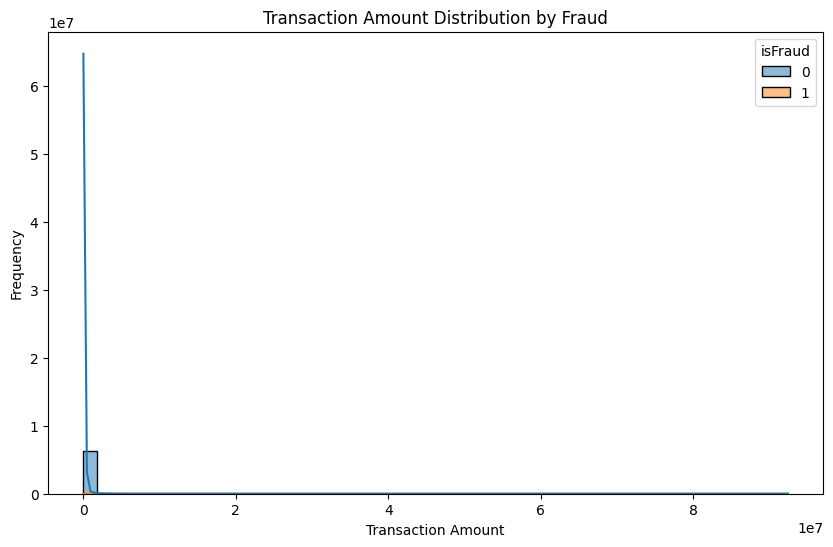

In [12]:
# Histogram grafiği ile "amount" özelliğinin dağılımını görselleştirme
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='amount', hue='isFraud', bins=50, kde=True)
plt.title("Transaction Amount Distribution by Fraud")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

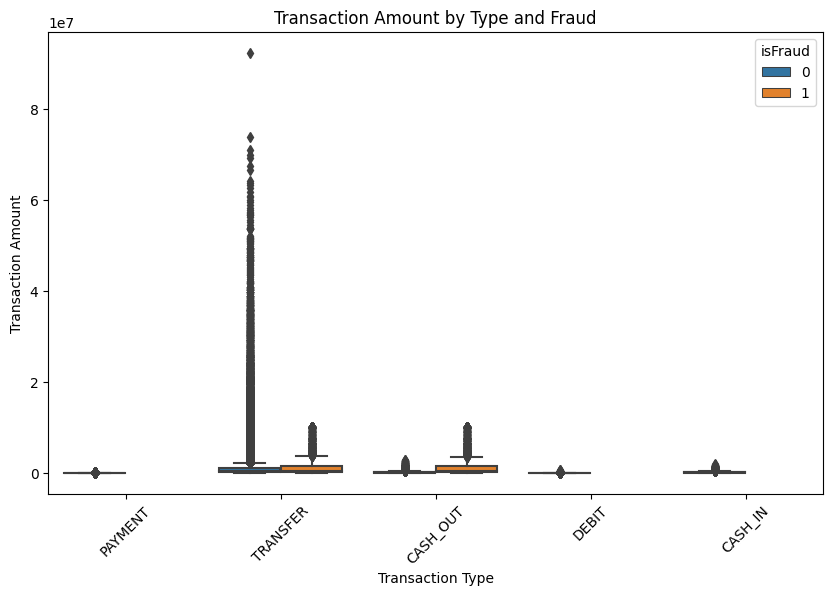

In [13]:
# Kutu grafiği ile "type" özelliğine göre "amount" özelliğinin dağılımını görselleştirme
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='type', y='amount', hue='isFraud')
plt.title("Transaction Amount by Type and Fraud")
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")
plt.xticks(rotation=45)
plt.show()

# Data analysis without outliers

In [16]:
summary_stats = cleaned_data.describe()
print("Veri Setinin İstatistiksel Özeti:\n", summary_stats)

c:\Users\muham\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Veri Setinin İstatistiksel Özeti:
                step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.317675e+06  6.317675e+06   6.317675e+06    6.317675e+06   
mean   2.430007e+02  1.469514e+05   8.378683e+05    8.609431e+05   
std    1.424002e+02  2.145047e+05   2.894816e+06    2.932741e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.550000e+02  1.324862e+04   0.000000e+00    0.000000e+00   
50%    2.380000e+02  7.329575e+04   1.443900e+04    0.000000e+00   
75%    3.340000e+02  2.051272e+05   1.077317e+05    1.471378e+05   
max    7.430000e+02  1.991430e+06   4.381886e+07    4.368662e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  \
count    6.317675e+06    6.317675e+06  6.317675e+06    6.317675e+06   
mean     1.056512e+06    1.142616e+06  1.033133e-03    6.331443e-07   
std      3.142693e+06    3.190580e+06  3.212578e-02    7.957035e-04   
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00 

In [17]:
# "isFraud" değişkenine göre sahtekarlık ve normal işlem sayılarını görüntüleme
fraud_counts = cleaned_data['isFraud'].value_counts()
print("\nSahtekarlık ve Normal İşlem Sayıları:\n", fraud_counts)


Sahtekarlık ve Normal İşlem Sayıları:
 0    6311148
1       6527
Name: isFraud, dtype: int64


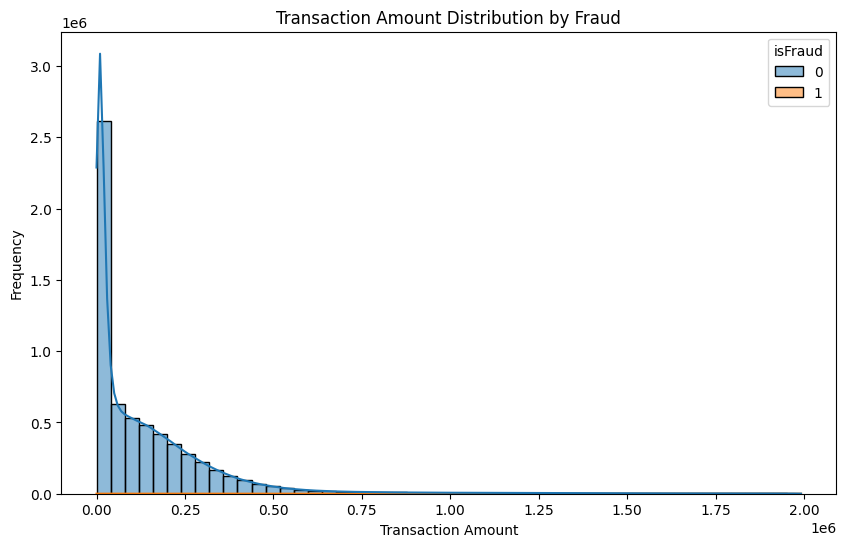

In [18]:
# Histogram grafiği ile "amount" özelliğinin dağılımını görselleştirme
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_data, x='amount', hue='isFraud', bins=50, kde=True)
plt.title("Transaction Amount Distribution by Fraud")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

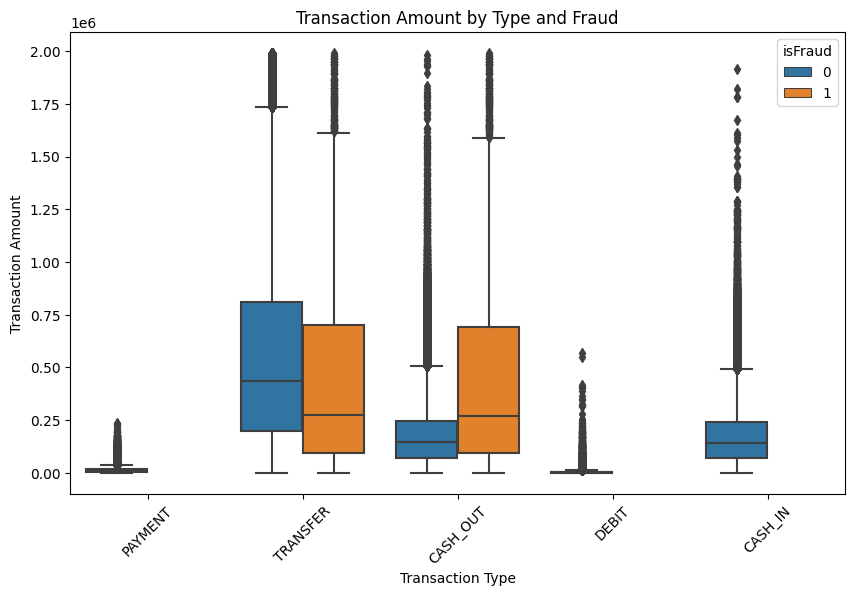

In [19]:
# Kutu grafiği ile "type" özelliğine göre "amount" özelliğinin dağılımını görselleştirme
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data, x='type', y='amount', hue='isFraud')
plt.title("Transaction Amount by Type and Fraud")
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")
plt.xticks(rotation=45)
plt.show()